# **Personalized Disease Specific Nutrition Recommendation System**

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZR5NSyjzFOGBzBQhZs5dcSyVjm83DXNbQtg&s" alt="Alt text" width="500" height="300">

## **Introduction to Chronic Diseases**
### **Definition:**
Chronic diseases are long-lasting health conditions that develop slowly and worsen over time if unmanaged.
### **Common Examples:**
Includes asthma, cardiovascular disease, chronic kidney disease, chronic liver disease, and diabetes.
### **Management:**
They cannot be cured but can be controlled through medications, lifestyle changes, and proper monitoring.
### **Causes:**
Factors include genetics, unhealthy diet, lack of exercise, smoking, and aging.
### **Prevention:**
Healthy diet, regular physical activity, avoiding tobacco and excessive alcohol, and maintaining a healthy weight.
### **Role of Nutrition:**
Proper food choices help manage symptoms, prevent complications, and improve overall quality of life.

## **Mounting Google Drive in Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install jupyter-dash dash pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


## **Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [4]:
dataset_path = '/content/drive/My Drive/Nutrition_recommendation_system/Chronic_disease_less.csv'
df = pd.read_csv(dataset_path)

In [5]:
df.head(10)

,Patient ID,Disease Name,Gender,Age,BMI,Smoking,Alcohol Consumption,Food Preference,Food Allergies,Blood Glucose(mg/dL),Blood Pressure(mmHg),Symptoms,Nutritional Requirement,Cholesterol Levels(mg/dL),Kidney Function (mg/dL),Caloric Intake,Hydration Level,Meal
0,1,Asthma,Male,42,15.8,No,No,Non-Vegetarian,Seafood,160.0,120/80,Chest tightness,Low,200,NaN,2000.0,Moderate,Chicken Biryani with Low-Fat Yogurt
1,2,Asthma,Female,61,22.8,No,Yes,Non-Vegetarian,Seafood,140.0,110/70,Swelling,Moderate,200,0.9,1800.0,Moderate,Fish Curry with Brown Rice
2,3,Asthma,Male,55,18.4,No,Yes,Vegan,Dairy,200.0,120/80,Shortness of Breath,High,180,1.5,1200.0,Moderate,Sweet Potato and Chickpea Stew
3,4,Asthma,Female,55,38.5,No,Yes,Non-Vegetarian,Seafood,160.0,120/80,Shortness of Breath,Moderate,200,1.5,2500.0,Moderate,Chicken Biryani with Low-Fat Yogurt
4,5,Asthma,Male,43,19.3,No,No,Vegan,Seafood,NaN,140/90,Swelling,Low,250,NaN,1500.0,Low,Grilled Tofu with Brown Rice
5,6,Asthma,Male,44,21.8,No,Yes,Vegetarian,Nuts,160.0,120/80,Chest tightness,Moderate,180,1.5,1800.0,Moderate,Vegetable Khichdi
6,7,Asthma,Female,40,30.2,Yes,No,Non-Vegetarian,Gluten,200.0,120/80,Swelling,Moderate,220,1.5,1200.0,Low,Grilled Fish with Avocado Salad
7,8,Asthma,Male,42,26.0,Yes,Yes,Non-Vegetarian,Gluten,180.0,120/80,Chest tightness,High,250,NaN,1500.0,Low,Egg Salad with Vegetables
8,9,Asthma,Female,49,32.7,No,No,Vegan,NaN,160.0,130/85,Fatigue,High,250,1.5,2200.0,High,Sweet Potato and Chickpea Stew
9,10,Asthma,Female,63,29.9,No,No,Vegetarian,Gluten,160.0,140/90,Chest tightness,Low,200,NaN,2200.0,High,Methi Paratha with Yogurt


In [6]:
df.shape

(16283, 18)

In [7]:
df.describe()

,Patient ID,Age,BMI,Blood Glucose(mg/dL),Cholesterol Levels(mg/dL),Kidney Function (mg/dL),Caloric Intake
count,16283.000000,16283.000000,16283.000000,15483.000000,16283.000000,11275.000000,16283.000000
mean,8142.000000,52.595038,27.469226,166.504812,188.165756,1.288831,1884.856261
std,4700.641552,7.538110,6.844310,26.595163,27.465248,0.563894,379.696082
min,1.000000,40.000000,15.000000,70.000000,119.000000,0.500000,471.000000
25%,4071.500000,46.000000,21.900000,140.000000,170.000000,0.900000,1800.000000
50%,8142.000000,53.000000,27.400000,160.000000,186.000000,1.380000,2000.000000
75%,12212.500000,59.000000,32.900000,180.000000,210.000000,1.500000,2100.000000
max,16283.000000,65.000000,95.200000,200.000000,250.000000,4.990000,5000.000000


## **Fix the column names**

In [8]:
df.columns

Index(['Patient ID', 'Disease Name', 'Gender', 'Age', 'BMI', 'Smoking',
       'Alcohol Consumption', 'Food Preference', 'Food Allergies',
       'Blood Glucose(mg/dL)', 'Blood Pressure(mmHg)', 'Symptoms',
       'Nutritional Requirement', 'Cholesterol Levels(mg/dL)',
       'Kidney Function (mg/dL)', 'Caloric Intake', 'Hydration Level', 'Meal'],
      dtype='object')

In [9]:
df.rename(columns={'Blood Glucose(mg/dL)': 'Blood_Glucose',
                   'Cholesterol Levels(mg/dL)':'Cholesterol_Levels',
                   'Blood Pressure(mmHg)':'Blood_Pressure',
                   'Kidney Function (mg/dL)': 'Kidney_Function'}, inplace=True)

In [10]:
df.columns

Index(['Patient ID', 'Disease Name', 'Gender', 'Age', 'BMI', 'Smoking',
       'Alcohol Consumption', 'Food Preference', 'Food Allergies',
       'Blood_Glucose', 'Blood_Pressure', 'Symptoms',
       'Nutritional Requirement', 'Cholesterol_Levels', 'Kidney_Function',
       'Caloric Intake', 'Hydration Level', 'Meal'],
      dtype='object')

## **Fix the datatype**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               16283 non-null  int64  
 1   Disease Name             16283 non-null  object 
 2   Gender                   16283 non-null  object 
 3   Age                      16283 non-null  int64  
 4   BMI                      16283 non-null  float64
 5   Smoking                  16283 non-null  object 
 6   Alcohol Consumption      16283 non-null  object 
 7   Food Preference          16283 non-null  object 
 8   Food Allergies           15612 non-null  object 
 9   Blood_Glucose            15483 non-null  float64
 10  Blood_Pressure           16283 non-null  object 
 11  Symptoms                 16283 non-null  object 
 12  Nutritional Requirement  16283 non-null  object 
 13  Cholesterol_Levels       16283 non-null  int64  
 14  Kidney_Function       

In [12]:
def categorize_blood_pressure(bp):
    systolic, diastolic = map(int, bp.split('/'))
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif systolic < 140 or diastolic < 90:
        return 'High'
    else:
        return 'Hypertension'

df['Blood_Pressure_Category'] = df['Blood_Pressure'].apply(categorize_blood_pressure)

In [13]:
df.drop('Blood_Pressure', axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               16283 non-null  int64  
 1   Disease Name             16283 non-null  object 
 2   Gender                   16283 non-null  object 
 3   Age                      16283 non-null  int64  
 4   BMI                      16283 non-null  float64
 5   Smoking                  16283 non-null  object 
 6   Alcohol Consumption      16283 non-null  object 
 7   Food Preference          16283 non-null  object 
 8   Food Allergies           15612 non-null  object 
 9   Blood_Glucose            15483 non-null  float64
 10  Symptoms                 16283 non-null  object 
 11  Nutritional Requirement  16283 non-null  object 
 12  Cholesterol_Levels       16283 non-null  int64  
 13  Kidney_Function          11275 non-null  float64
 14  Caloric Intake        

## **Exploratory Data Analysis**

## **Importance of EDA:**
Exploratory Data Analysis (EDA) helps uncover patterns, detect anomalies, test hypotheses, and summarize key characteristics of the data, ensuring better insights and informed decision-making before applying machine learning models.

This EDA primarily focuses on addressing the following key questions and deriving statistical insights:

1. Is smoking and alcohol consumption the primary cause of chronic diseases?
2. What are the key symptoms of cardiovascular disease, given its high vulnerability compared to other chronic diseases?
3. How does Body Mass Index (BMI) correlate with the risk of developing chronic diseases?
4. What is the distribution of patients by gender? What percentage are male versus female?
5. What is the average caloric intake of patients, and how does it vary based on their symptoms?

These questions aim to uncover meaningful patterns and relationships within the data to gain a better understanding of chronic diseases.

## **1. Is smoking and alcohol consumption the primary cause of chronic diseases?**

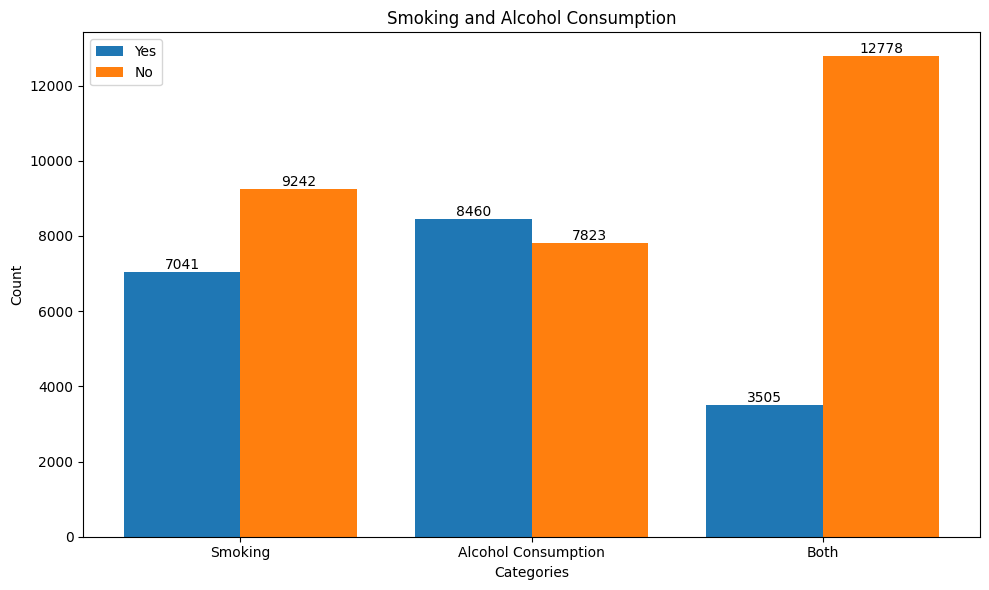

In [15]:
def calculate_combined_count(column):
    yes_count = len(df[df[column] == 'Yes'])
    no_count = len(df[df[column] == 'No'])
    return yes_count, no_count

def calculate_both_count():
    both_yes_count = len(df[(df['Smoking'] == 'Yes') & (df['Alcohol Consumption'] == 'Yes')])
    both_no_count = len(df) - both_yes_count
    return both_yes_count, both_no_count

categories = ['Smoking', 'Alcohol Consumption', 'Both']
counts = {
    'Smoking': calculate_combined_count('Smoking'),
    'Alcohol Consumption': calculate_combined_count('Alcohol Consumption'),
    'Both': calculate_both_count()
}

x = np.arange(len(categories))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

yes_counts = [counts[category][0] for category in categories]
no_counts = [counts[category][1] for category in categories]

bars_yes = ax.bar(x - width / 2, yes_counts, width, label='Yes')
bars_no = ax.bar(x + width / 2, no_counts, width, label='No')

for bar in bars_yes:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

for bar in bars_no:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Smoking and Alcohol Consumption')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


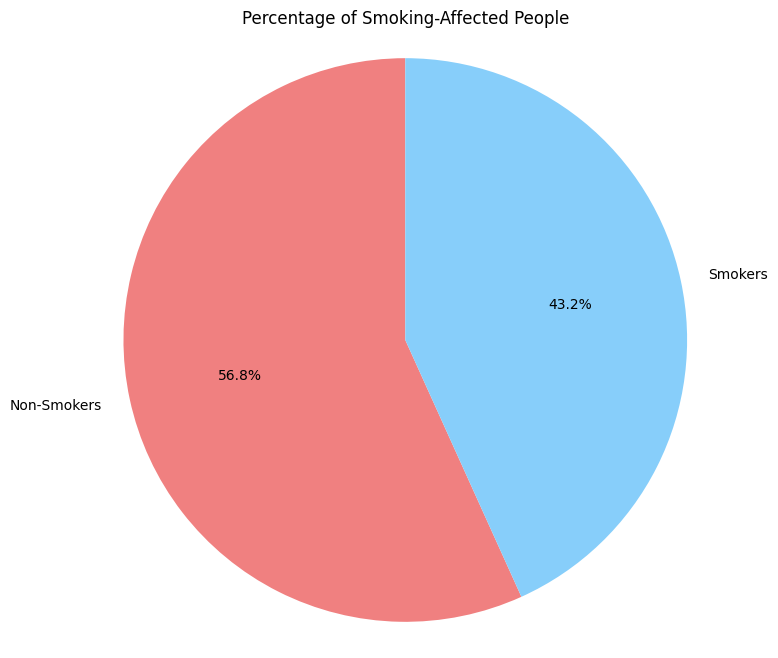

In [16]:
# Pie Chart 1: Percentage of Smoking-Affected People
smoking_count = df['Smoking'].value_counts()
smoking_labels = ['Non-Smokers', 'Smokers']
plt.figure(figsize=(8, 8))
plt.pie(smoking_count, labels=smoking_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Percentage of Smoking-Affected People')
plt.axis('equal')
plt.show()


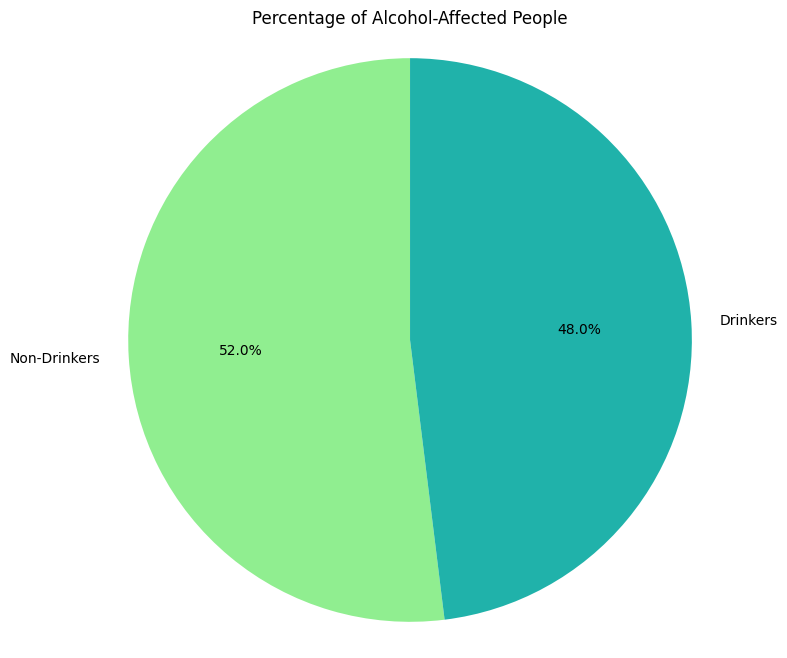

In [17]:
# Pie Chart 2: Percentage of Alcohol-Affected People
alcohol_count = df['Alcohol Consumption'].value_counts()
alcohol_labels = ['Non-Drinkers', 'Drinkers']
plt.figure(figsize=(8, 8))
plt.pie(alcohol_count, labels=alcohol_labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightseagreen'])
plt.title('Percentage of Alcohol-Affected People')
plt.axis('equal')
plt.show()

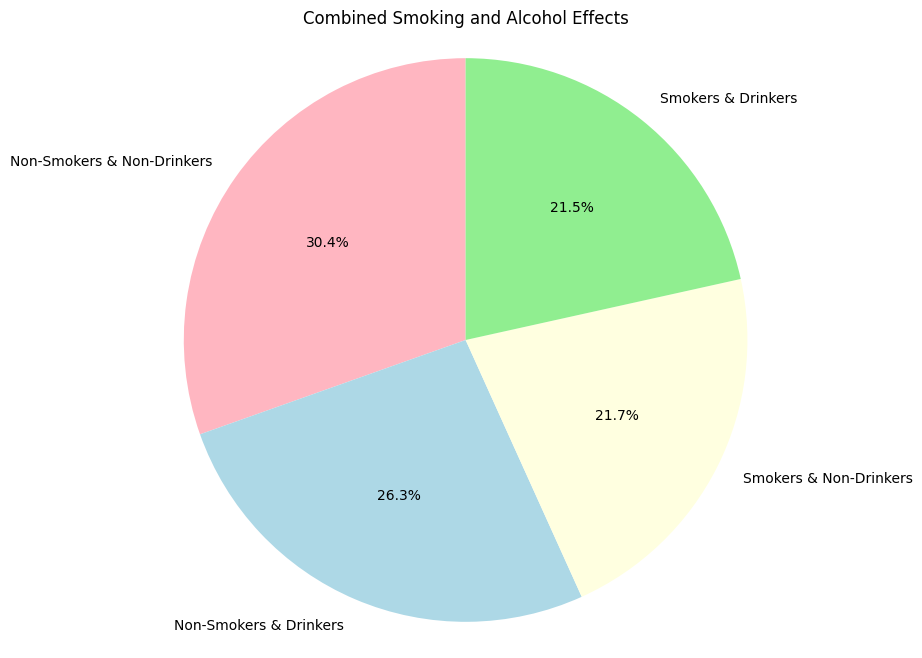

In [18]:
# Pie Chart 3: Combined Smoking and Alcohol Effects
df['Smoking_Alcohol'] = df['Smoking'] + ' & ' + df['Alcohol Consumption']
combined_count = df['Smoking_Alcohol'].value_counts()

combined_labels = ['Non-Smokers & Non-Drinkers', 'Non-Smokers & Drinkers', 'Smokers & Non-Drinkers', 'Smokers & Drinkers']

plt.figure(figsize=(8, 8))
plt.pie(combined_count, labels=combined_labels, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue', 'lightyellow', 'lightgreen'])
plt.title('Combined Smoking and Alcohol Effects')
plt.axis('equal')
plt.show()

### Answer

1. Smoking and alcohol consumption are significant risk factors, but not the sole causes of chronic diseases.
2. Analysis of bar and pie charts shows a correlation between these habits and the prevalence of chronic diseases among patients.
3. WHO findings:
* Smoking causes 8 million deaths annually, linked to cardiovascular diseases, COPD, and cancer.
* Excessive alcohol contributes to 3 million deaths per year, associated with liver disease, hypertension, and diabetes.
4. Conclusion: Smoking and alcohol consumption are major contributors, but other factors like genetics, diet, and exercise also play a critical role.
For more details, refer to WHO's research on [tobacco](https://www.who.int/news-room/fact-sheets/detail/tobacco) and [alcohol](https://www.who.int/news-room/fact-sheets/detail/alcohol).

## **2. What are the key symptoms of cardiovascular disease, given its high vulnerability compared to other chronic diseases?**

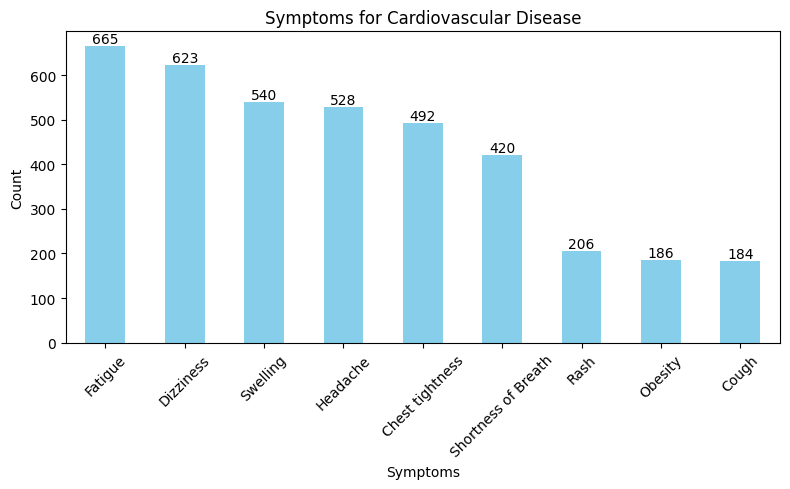

In [19]:
cardio_df = df[df['Disease Name'] == 'Cardiovascular Disease']
symptom_count = cardio_df['Symptoms'].value_counts()
ax = symptom_count.plot(kind='bar', figsize=(8, 5), color='skyblue')

for i, v in enumerate(symptom_count):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

plt.title('Symptoms for Cardiovascular Disease')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Answer

1. Cardiovascular diseases (CVDs) are highly vulnerable and require immediate treatment when symptoms are severe.

2. According to the American Heart Association (AHA), heart disease remains the leading cause of death worldwide, and heart attacks are a significant contributor to this burden.

3. Conclusion: Early detection and immediate treatment are crucial to prevent complications and reduce the risk of mortality.

For more information, visit:
[American Heart Association - Cardiovascular Disease](https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.121.054516)


## **3. How does Body Mass Index (BMI) correlate with the risk of developing chronic diseases?**

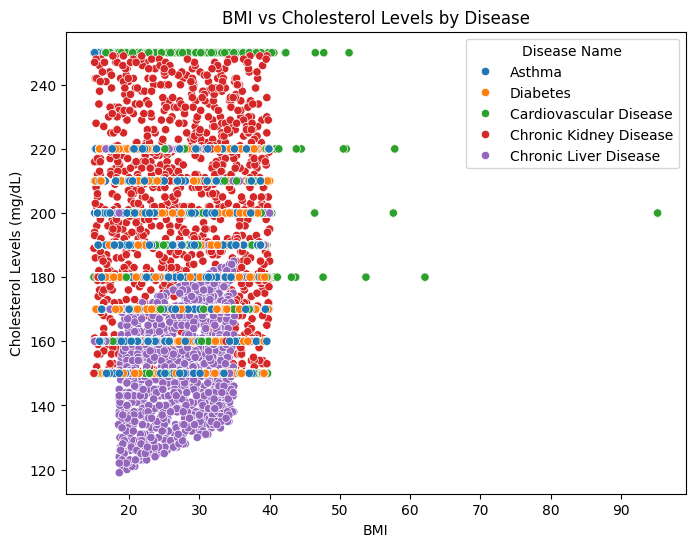

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Cholesterol_Levels', hue='Disease Name', data=df)
plt.title('BMI vs Cholesterol Levels by Disease')
plt.xlabel('BMI')
plt.ylabel('Cholesterol Levels (mg/dL)')
plt.legend(title='Disease Name')
plt.show()

### Answer
1. Body Mass Index (BMI) and cholesterol levels are closely associated with the risk of chronic diseases, including cardiovascular diseases, diabetes, and liver conditions. Elevated BMI often leads to obesity, which is a major risk factor for abnormal cholesterol levels and chronic diseases.

2. Key Relationship:
* BMI: Higher BMI is a significant indicator of overweight and obesity, which increases the risk of developing non-communicable diseases.
* Cholesterol Levels: Elevated cholesterol, particularly LDL (bad cholesterol), accelerates the development of cardiovascular diseases and other chronic illnesses.
3. Research Evidence:
According to the World Health Organization (WHO), an increased BMI is a major risk factor for non-communicable diseases, such as cardiovascular diseases (especially heart disease and stroke), diabetes, and some cancers. Similarly, unhealthy cholesterol levels, often found in people with obesity, further contribute to disease progression.

4. Conclusion: The scatterplot demonstrates that higher BMI correlates with elevated cholesterol levels, which significantly increases the risk of chronic diseases. Effective weight management and cholesterol control are critical in preventing such conditions.

For more information, visit: [World Health Organization - Obesity and Overweight](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight)

## **4. What is the distribution of patients by gender? What percentage are male versus female?**

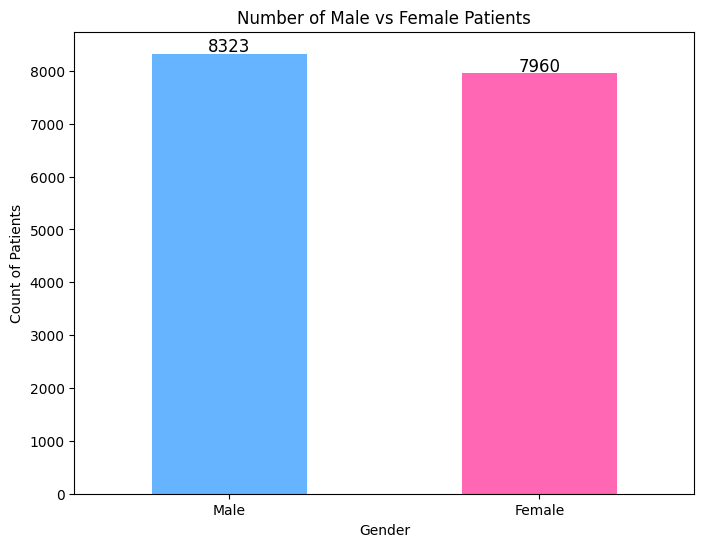

In [21]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
ax = gender_counts.plot(kind='bar', color=['#66b3ff','#ff66b3'])
plt.title('Number of Male vs Female Patients')
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()


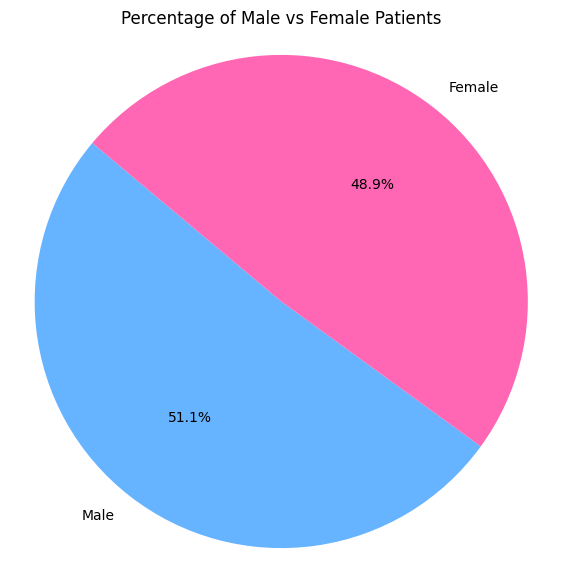

In [22]:
gender_percent = (gender_counts / len(df)) * 100

plt.figure(figsize=(7, 7))
plt.pie(gender_percent, labels=gender_percent.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff66b3'])
plt.title('Percentage of Male vs Female Patients')
plt.axis('equal')
plt.show()

### Answer

1. Male Patients: 8,323 (51.1%)
2. Female Patients: 7,960 (48.9%)
3. Insight: Male patients slightly outnumber female patients by 2.2%.

## **5. What is the average caloric intake of patients, and how does it vary based on their symptoms?**

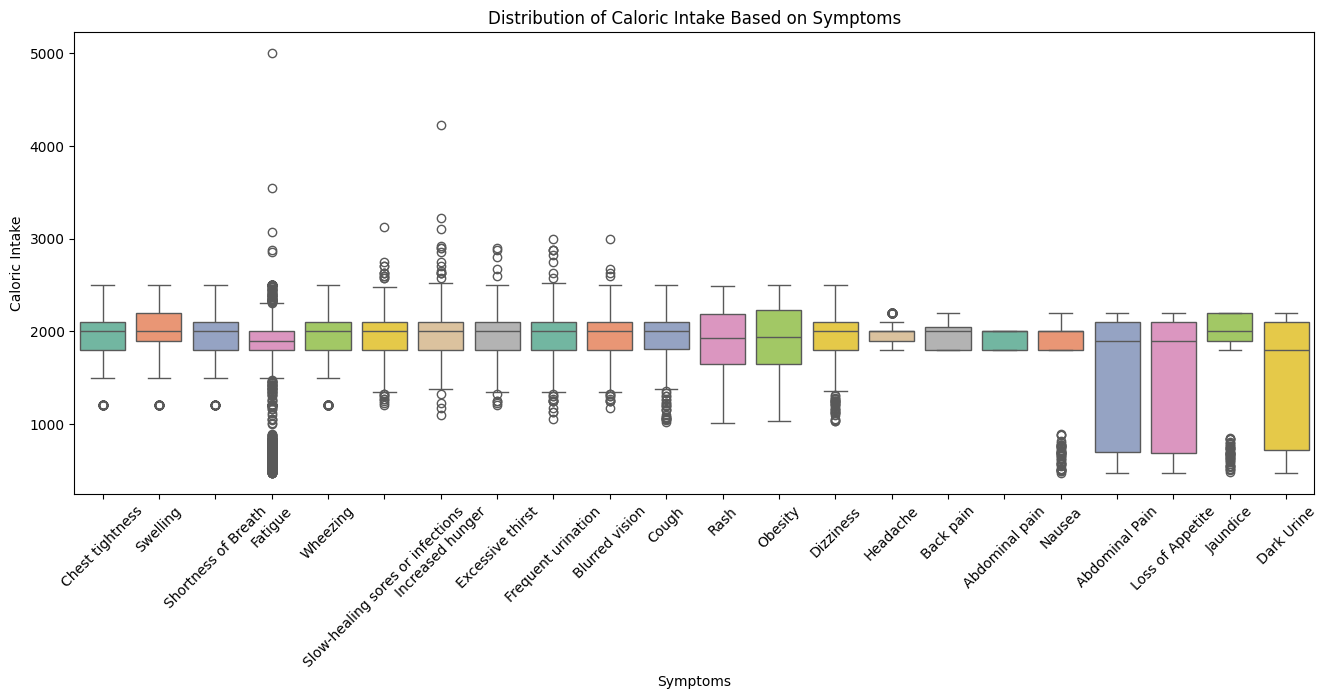

In [23]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Symptoms', y='Caloric Intake', data=df, palette='Set2')
plt.title('Distribution of Caloric Intake Based on Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Caloric Intake')
plt.xticks(rotation=45)
plt.show()

### Answer

1. The overall average caloric intake for patients is approximately 2000-2200 calories.

2. Symptoms like Fatigue, Loss of Appetite, and Nausea show lower median caloric intake, around 1500-1700 calories, with noticeable drops.

3. Symptoms such as Increased Hunger and Obesity exhibit higher caloric intake, with outliers reaching 4000-5000 calories.

4. Wide variability in caloric intake is observed for symptoms like Excessive Thirst, while symptoms like Shortness of Breath remain closer to the average range.

5. World Health Organization (WHO): Patients with chronic illnesses, especially those with cachexia (e.g., chronic heart failure or cancer), need tailored nutrition plans with higher energy intake to maintain body weight and muscle mass.

For more information, visit: [WHO](https://www.who.int/teams/nutrition-and-food-safety)

## **Outlier Detection and Removal**

### **Detecting outliers**

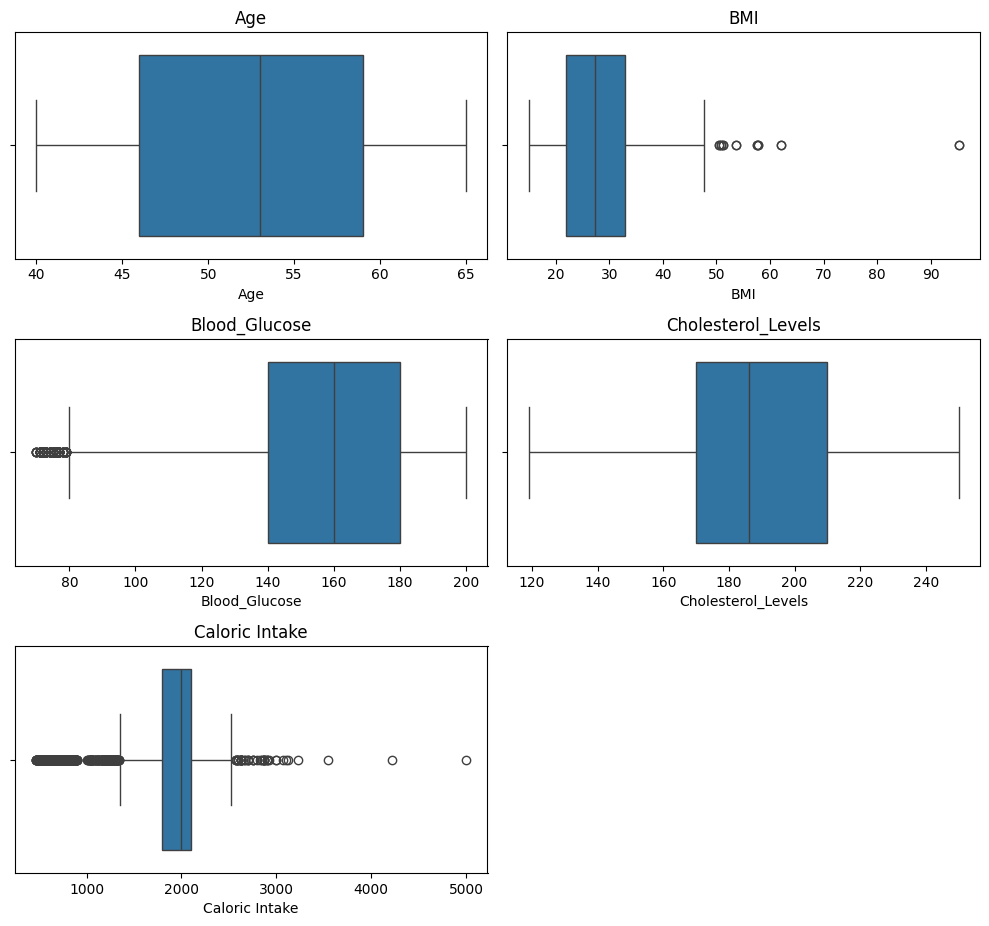

In [24]:
numerical_columns = ['Age', 'BMI', 'Blood_Glucose', 'Cholesterol_Levels',
                      'Caloric Intake']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    if column in df.columns:
        sns.boxplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(column)
    else:
        print(f"Column {column} not found in DataFrame!")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [25]:
print("Shape of DataFrame before outlier removal:", df.shape)

Shape of DataFrame before outlier removal: (16283, 19)


### **Removing outliers**

In [26]:
df = df.copy()
for column in numerical_columns:
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

### **After outlier detection**

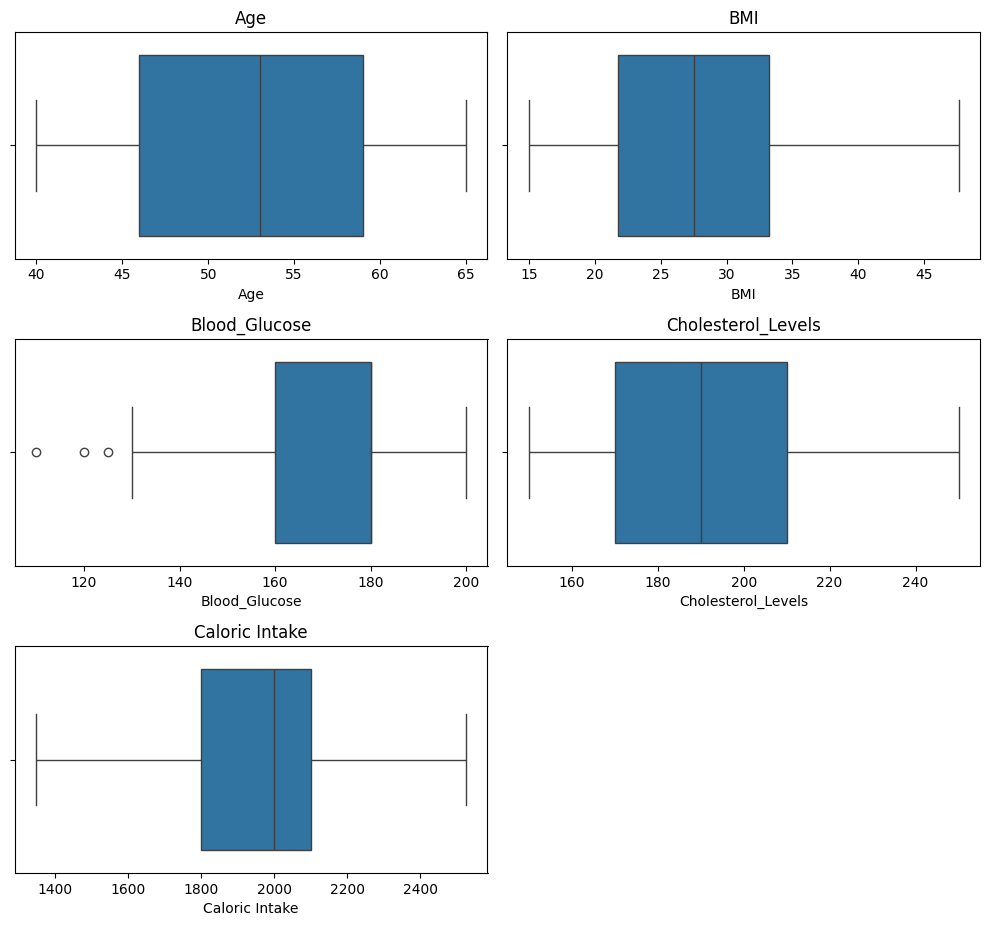

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    if column in df.columns:
        sns.boxplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(column)
    else:
        print(f"Column {column} not found in DataFrame!")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
print("Shape of DataFrame after outlier removal:", df.shape)

Shape of DataFrame after outlier removal: (14213, 19)


## **Distribution Analysis of Numerical Features**

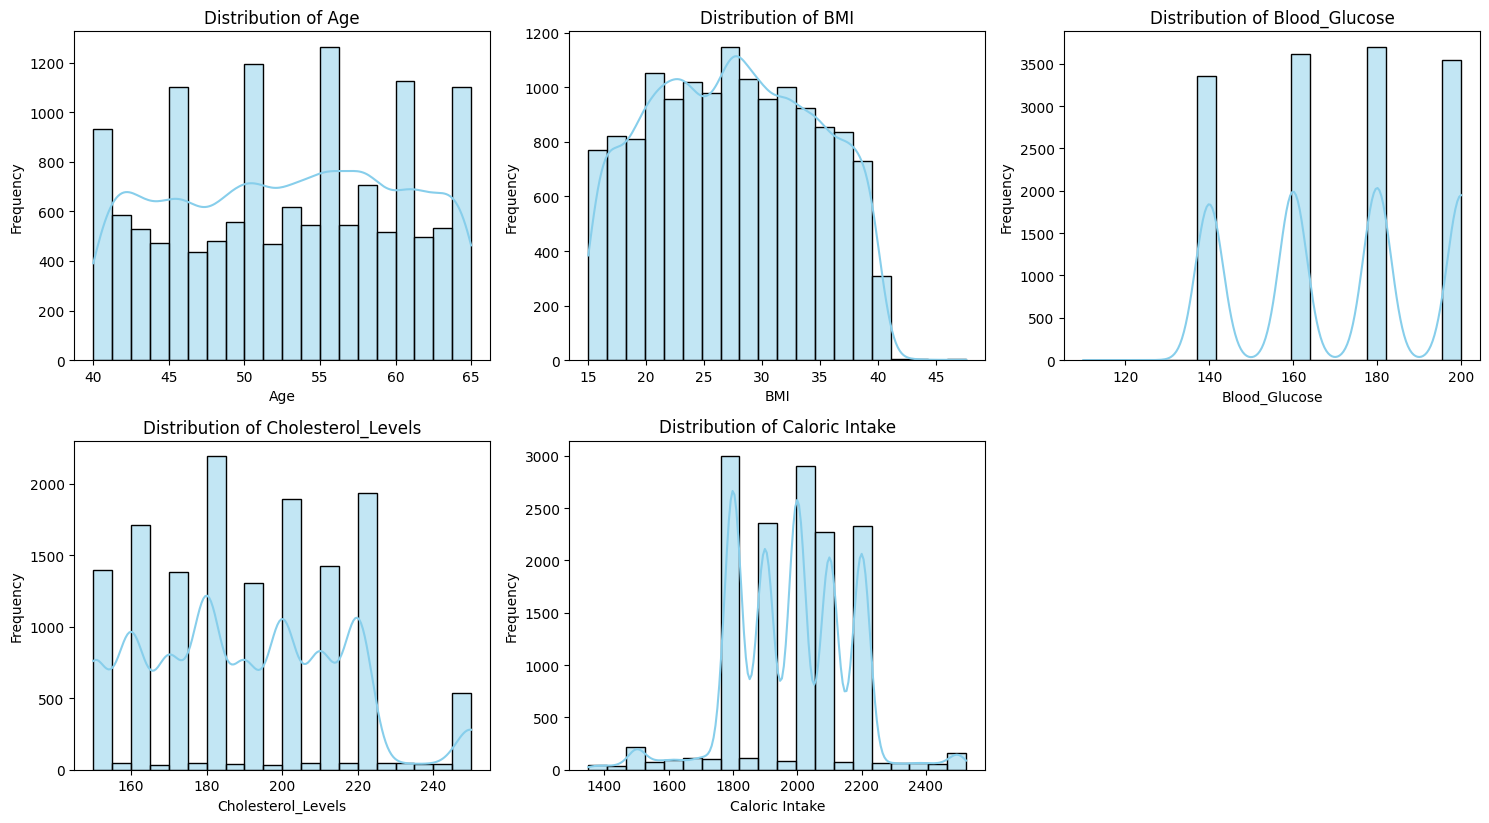

In [29]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Univariate Analysis of Numerical Columns**

In [30]:
def numeric_univariate_analysis(df, numerical_columns):
    for col_name in numerical_columns:
        print('*' * 5, col_name, '*' * 5)
        print(df[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()
numerical_columns = ['Age', 'BMI', 'Blood_Glucose', 'Caloric Intake']
numeric_univariate_analysis(df, numerical_columns)

***** Age *****
min       40.000000
max       65.000000
mean      52.794976
median    53.000000
std        7.351258
skew      -0.055552
kurt      -1.165893
Name: Age, dtype: float64

***** BMI *****
min       15.000000
max       47.600000
mean      27.491297
median    27.500000
std        6.891445
skew       0.029819
kurt      -1.067455
Name: BMI, dtype: float64

***** Blood_Glucose *****
min       110.000000
max       200.000000
mean      170.448885
median    180.000000
std        22.099209
skew       -0.029770
kurt       -1.324136
Name: Blood_Glucose, dtype: float64

***** Caloric Intake *****
min       1350.000000
max       2525.000000
mean      1980.659607
median    2000.000000
std        179.547232
skew        -0.114165
kurt         0.518710
Name: Caloric Intake, dtype: float64



## **Univariate Analysis of Categorical Columns**

In [31]:
def categorical_univariate_analysis(cat_data):
    for col_name in cat_data.columns:
        print('*' * 5, col_name, '*' * 5)
        print('Count:', cat_data[col_name].count())
        print('Unique values:', cat_data[col_name].nunique())
        print('Unique categories:', cat_data[col_name].unique())
        print()
categorical_univariate_analysis(df[['Food Preference','Food Allergies','Symptoms','Meal']])

***** Food Preference *****
Count: 14213
Unique values: 3
Unique categories: ['Non-Vegetarian' 'Vegetarian' 'Vegan']

***** Food Allergies *****
Count: 13814
Unique values: 10
Unique categories: ['Seafood' 'Nuts' 'Gluten' nan 'Dairy' 'Peanuts' 'Tree nuts' 'Fish' 'Soy'
 'Eggs' 'Shellfish']

***** Symptoms *****
Count: 14213
Unique values: 22
Unique categories: ['Chest tightness' 'Swelling' 'Shortness of Breath' 'Fatigue' 'Wheezing'
 'Slow-healing sores or infections' 'Excessive thirst'
 'Frequent urination' 'Increased hunger' 'Blurred vision' 'Cough' 'Rash'
 'Obesity' 'Dizziness' 'Headache' 'Back pain' 'Abdominal pain' 'Nausea'
 'Dark Urine' 'Abdominal Pain' 'Loss of Appetite' 'Jaundice']

***** Meal *****
Count: 14213
Unique values: 48
Unique categories: ['Chicken Biryani with Low-Fat Yogurt' 'Fish Curry with Brown Rice'
 'Vegetable Khichdi' 'Egg Salad with Vegetables'
 'Sweet Potato and Chickpea Stew' 'Methi Paratha with Yogurt'
 'Masoor Dal and Rice' 'Egg Bhurji with Whole Wheat Brea

## **Class Distribution of Target Variable**

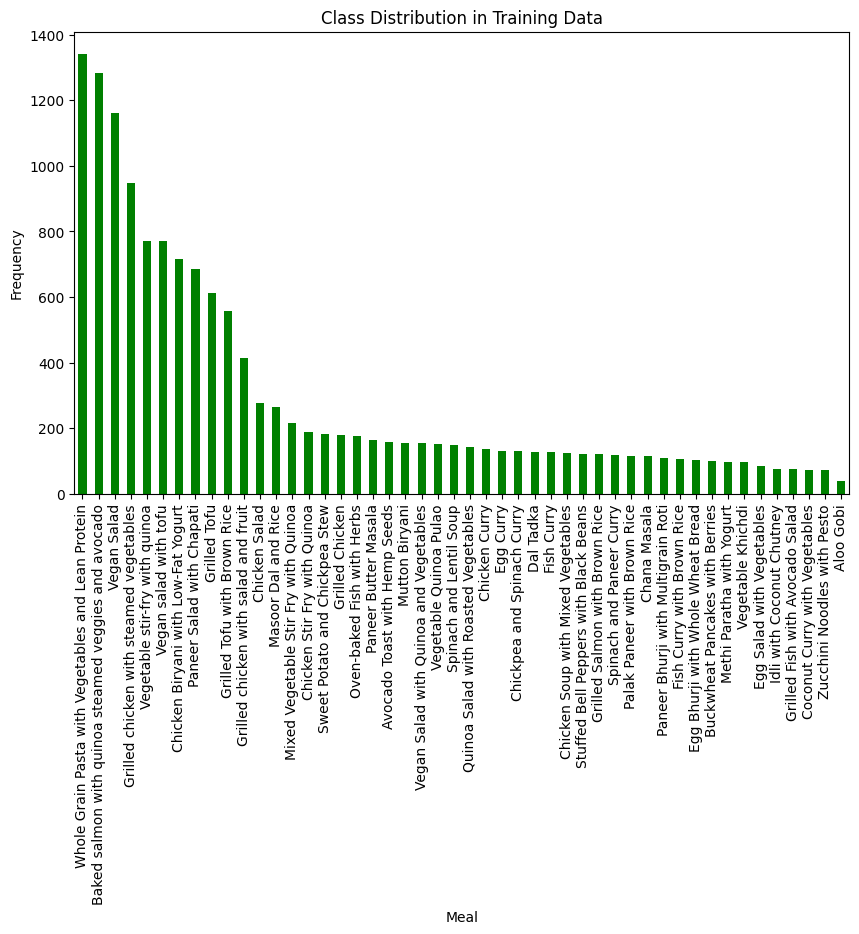

In [32]:
plt.figure(figsize=(10, 6))
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
df['Meal'].value_counts().plot(kind='bar', color='green')
plt.show()

## **Interactive Dashboard**

In [33]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        html.Label("Gender:"),
        dcc.Dropdown(
            id="gender-filter",
            options=[{"label": gender, "value": gender} for gender in df["Gender"].unique()],
            value=None,
            placeholder="Select Gender",
        ),
    ], style={"width": "30%", "display": "inline-block"}),

    html.Div([
        html.Label("Disease Name:"),
        dcc.Dropdown(
            id="disease-filter",
            options=[{"label": disease, "value": disease} for disease in df["Disease Name"].unique()],
            value=None,
            placeholder="Select Disease",
        ),
    ], style={"width": "30%", "display": "inline-block", "marginLeft": "20px"}),

    dcc.Graph(id="scatter-plot", style={"height": "600px"}),

    html.Div([
        html.Div([
            dcc.Graph(id="smoking-bar-chart"),
        ], style={"width": "45%", "display": "inline-block"}),

        html.Div([
            dcc.Graph(id="alcohol-bar-chart"),
        ], style={"width": "45%", "display": "inline-block", "marginLeft": "5%"}),
    ]),
])

@app.callback(
    [
        Output("scatter-plot", "figure"),
        Output("smoking-bar-chart", "figure"),
        Output("alcohol-bar-chart", "figure"),
    ],
    [
        Input("gender-filter", "value"),
        Input("disease-filter", "value"),
    ]
)
def update_dashboard(selected_gender, selected_disease):
    filtered_df = df.copy()
    if selected_gender:
        filtered_df = filtered_df[filtered_df["Gender"] == selected_gender]
    if selected_disease:
        filtered_df = filtered_df[filtered_df["Disease Name"] == selected_disease]

    if filtered_df.empty:
        empty_fig = {
            "data": [],
            "layout": {"title": "No Data Available for Selected Filters"}
        }
        return empty_fig, empty_fig, empty_fig

    scatter_fig = px.scatter(
        filtered_df,
        x="BMI",
        y="Cholesterol_Levels",
        size="BMI",
        color="Gender",
        title="BMI vs Cholesterol Levels",
    )

    smoking_data = filtered_df["Smoking"].value_counts().reset_index()
    smoking_data.columns = ["Smoking", "Count"]
    smoking_fig = px.bar(
        smoking_data,
        x="Smoking",
        y="Count",
        color="Smoking",
        title="Proportion of Patients who Smoke",
        color_discrete_map={"Yes": "blue", "No": "red"}
    )

    alcohol_data = filtered_df["Alcohol Consumption"].value_counts().reset_index()
    alcohol_data.columns = ["Alcohol Consumption", "Count"]
    alcohol_fig = px.bar(
        alcohol_data,
        x="Alcohol Consumption",
        y="Count",
        color="Alcohol Consumption",
        title="Proportion of Patients who Consume Alcohol",
        color_discrete_map={"Yes": "blue", "No": "red"}
    )

    return scatter_fig, smoking_fig, alcohol_fig

app.run_server(mode='external', port=8050)


Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Functions the Dashboard is Performing:**
### **Filter Data:**

Allows users to filter data dynamically based on Gender and Disease Name using dropdowns.
### **Scatter Plot Visualization:**

Displays a scatter plot of BMI vs Cholesterol Levels, categorized by gender, providing insights into relationships between these variables.
### **Bar Chart Analysis:**

Shows the proportion of patients who smoke and consume alcohol using bar charts for quick comparisons.

## **Data Preprocessing**

## **Handling missing values**

In [34]:
df.isnull().sum()

,0
Patient ID,0
Disease Name,0
Gender,0
Age,0
BMI,0
Smoking,0
Alcohol Consumption,0
Food Preference,0
Food Allergies,399
Blood_Glucose,0


In [35]:
df['Food Allergies'].fillna('No Allergy', inplace=True)

In [36]:
df['Blood_Glucose'].fillna(df['Blood_Glucose'].median(), inplace=True)
df['Kidney_Function'].fillna(df['Kidney_Function'].median(), inplace=True)

In [37]:
df.isnull().sum()

,0
Patient ID,0
Disease Name,0
Gender,0
Age,0
BMI,0
Smoking,0
Alcohol Consumption,0
Food Preference,0
Food Allergies,0
Blood_Glucose,0


## **Data Transformation**

### **Encoding categorical values**

In [38]:
le = LabelEncoder()

In [39]:
columns_to_encode = [
    'Gender', 'Smoking', 'Alcohol Consumption', 'Food Preference',
    'Nutritional Requirement', 'Blood_Pressure_Category', 'Hydration Level',
    'Disease Name', 'Food Allergies', 'Symptoms'
]

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [40]:
print(df.head())

   Patient ID  Disease Name  Gender  Age   BMI  Smoking  Alcohol Consumption  \
0           1             0       1   42  15.8        0                    0   
1           2             0       0   61  22.8        0                    1   
3           4             0       0   55  38.5        0                    1   
5           6             0       1   44  21.8        0                    1   
7           8             0       1   42  26.0        1                    1   

   Food Preference  Food Allergies  Blood_Glucose  Symptoms  \
0                0               7          160.0         4   
1                0               7          140.0        20   
3                0               7          160.0        18   
5                2               5          160.0         4   
7                0               3          180.0         4   

   Nutritional Requirement  Cholesterol_Levels  Kidney_Function  \
0                        1                 200              1.2   
1     

In [41]:
df.drop('Smoking_Alcohol', axis=1, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14213 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               14213 non-null  int64  
 1   Disease Name             14213 non-null  int64  
 2   Gender                   14213 non-null  int64  
 3   Age                      14213 non-null  int64  
 4   BMI                      14213 non-null  float64
 5   Smoking                  14213 non-null  int64  
 6   Alcohol Consumption      14213 non-null  int64  
 7   Food Preference          14213 non-null  int64  
 8   Food Allergies           14213 non-null  int64  
 9   Blood_Glucose            14213 non-null  float64
 10  Symptoms                 14213 non-null  int64  
 11  Nutritional Requirement  14213 non-null  int64  
 12  Cholesterol_Levels       14213 non-null  int64  
 13  Kidney_Function          14213 non-null  float64
 14  Caloric Intake           14

## **Feature Selection**

In [46]:
X = df.drop(['Meal','Patient ID','Symptoms','Nutritional Requirement','Hydration Level','Gender','Kidney_Function'], axis=1)
y = df['Meal']

### **Feature importance**

In [47]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                    Feature  Importance
6            Food Allergies    0.225182
0              Disease Name    0.218361
5           Food Preference    0.131187
2                       BMI    0.095959
1                       Age    0.080936
9            Caloric Intake    0.075393
8        Cholesterol_Levels    0.062574
7             Blood_Glucose    0.039993
10  Blood_Pressure_Category    0.030663
3                   Smoking    0.020302
4       Alcohol Consumption    0.019450


## **Model Selection**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
def get_params(model, param_dist, X_train, y_train, n_iter=100, random_state=42):
    warnings.filterwarnings("ignore")
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, scoring='accuracy', cv=5,
                                       n_iter=n_iter, random_state=random_state)
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    param_string = " | ".join([f"{key}: {value}" for key, value in best_params.items() if value is not None])
    print(f"Best Parameters for {model.__class__.__name__}: {param_string}\n")

    return best_model

rf_param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(5, 20, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

In [56]:
print("Tuning Random Forest...")
best_rf_model = get_params(RandomForestClassifier(random_state=42), rf_param_dist, X_train, y_train)

Tuning Random Forest...
Best Parameters for RandomForestClassifier: n_estimators: 160 | min_samples_split: 7 | min_samples_leaf: 1 | bootstrap: False



## **Model Training**

In [59]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=7, n_estimators=160,
                       random_state=42)

## **Predication and Evaluation**

In [60]:
y_pred = best_rf_model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [62]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                                      precision    recall  f1-score   support

                                           Aloo Gobi       0.00      0.00      0.00         4
                       Avocado Toast with Hemp Seeds       0.84      0.84      0.84        25
Baked salmon with quinoa steamed veggies and avocado       1.00      0.99      0.99       273
                     Buckwheat Pancakes with Berries       0.92      0.67      0.77        18
                                        Chana Masala       1.00      0.63      0.77        27
                 Chicken Biryani with Low-Fat Yogurt       1.00      0.97      0.98       145
                                       Chicken Curry       0.88      0.75      0.81        28
                                       Chicken Salad       1.00      1.00      1.00        50
                  Chicken Soup with Mixed Vegetables       0.71      0.79      0.75        28
                        Chicken Stir

Confusion Matrix:


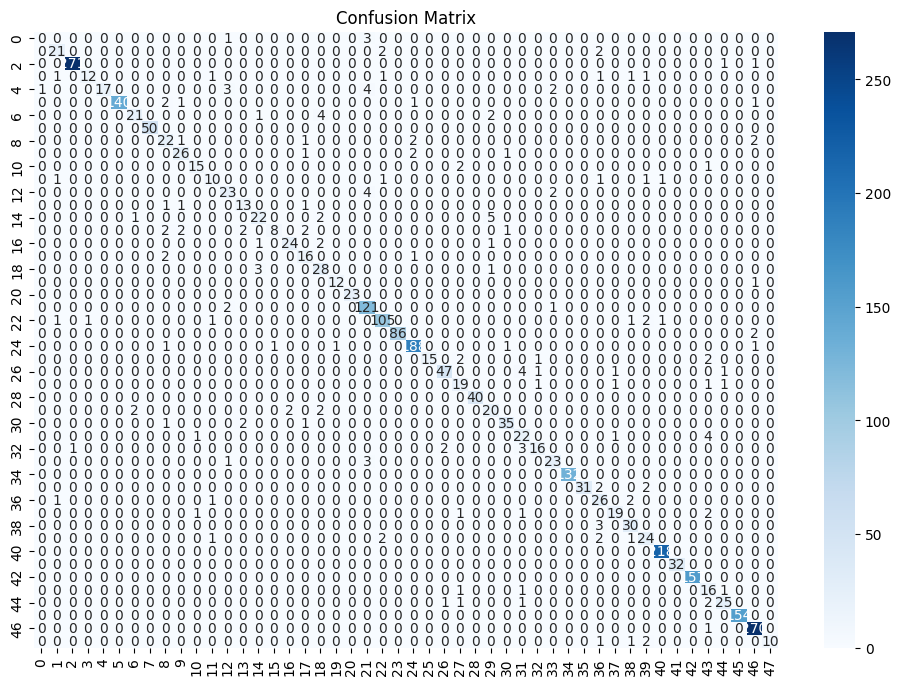

In [66]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## **Conclusion**

* The Random Forest model achieved a high overall accuracy of 93%, demonstrating its effectiveness in correctly classifying most instances.
* The precision metric (weighted average of 0.94) indicates that the model is effective at minimizing false positives across most classes.
* With a recall of 0.93, the model performs well in identifying true positives, although slight improvements could be made for specific classes.
* The F1-score, which balances precision and recall, is strong at 0.93, showing that the model maintains an effective trade-off between false positives and false negatives.
* The macro average for precision (0.86), recall (0.84), and F1-score (0.84) suggests that the model performs well across different classes, with relatively uniform results.

## **Saving the model**

In [70]:
joblib.dump(best_rf_model, 'nutrition_recommendation_model2.pkl')

['nutrition_recommendation_model2.pkl']

## **Recommendation Logic**

In [74]:
model = joblib.load('nutrition_recommendation_model2.pkl')

alternative_meals = {
    'vegan': [
        "Vegan Salad with Quinoa and Vegetables",
        "Sweet Potato and Chickpea Stew",
        "Grilled Tofu with Brown Rice",
        "Vegetable Khichdi",
        "Spinach and Lentil Soup",
        "Vegetable Stir-Fry with Quinoa",
        "Chickpea and Spinach Curry",
        "Buckwheat Pancakes with Berries",
        "Avocado Toast with Hemp Seeds"
    ],
    'vegetarian': [
        "Paneer Butter Masala",
        "Masoor Dal and Rice",
        "Vegetable Quinoa Pulao",
        "Spinach and Paneer Curry",
        "Idli with Coconut Chutney",
        "Palak Paneer with Brown Rice",
        "Vegetable Khichdi",
        "Methi Paratha with Yogurt",
        "Chana Masala",
        "Mixed Vegetable Stir Fry with Quinoa"
    ],
    'non-vegetarian': [
        "Chicken Biryani with Low-Fat Yogurt",
        "Fish Curry with Brown Rice",
        "Grilled Chicken with Steamed Vegetables",
        "Grilled Fish with Avocado Salad",
        "Oven-baked Fish with Herbs",
        "Grilled Chicken with Salad and Fruit",
        "Chicken Curry",
        "Mutton Biryani",
        "Grilled Salmon with Brown Rice"
    ]
}

def disease_specific_info(disease_name):
    info = {}
    if disease_name == 'diabetes':
        info['allergies'] = ["avoid high-sugar foods and processed foods (Dairy, Gluten, Soy)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1800-2200 calories/day (depending on activity level)"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'cardiovascular disease':
        info['allergies'] = ["avoid foods high in sodium, trans fats, and cholesterol(Shellfish, Eggs)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "2000-2400 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'asthma':
        info['allergies'] = ["avoid foods like Nuts, Peanuts, Shellfish, Fish, Dairy, Eggs"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1800-2200 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'chronic kidney disease':
        info['allergies'] = ["avoid foods high in potassium and phosphorus (Nuts, Tree nuts, Peanuts, Dairy, Shellfish)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1800-2200 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'chronic liver disease':
        info['allergies'] = ["avoid alcohol and fatty foods(Shellfish, Dairy)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1600-2000 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    return info

def get_user_input():
    while True:
        try:
            disease_name = input("Enter Disease Name (Diabetes, Cardiovascular Disease, Chronic Kidney Disease, Asthma, Chronic Liver Disease): ").strip().lower()
            if disease_name not in ['diabetes', 'cardiovascular disease', 'chronic kidney disease', 'asthma', 'chronic liver disease']:
                raise ValueError("Invalid Disease Name")

            age = int(input("Enter your age: "))
            if age <= 0:
                raise ValueError("Age must be a positive integer")

            bmi = float(input(f"Enter your BMI (normal range for your age: {disease_specific_info(disease_name)['bmi_range']}): "))
            if bmi <= 0:
                raise ValueError("BMI must be a positive number")

            info = disease_specific_info(disease_name)

            print("\nImportant Information for", disease_name.title())
            print(f"  - Glucose Range: {info['glucose_range']}")
            print(f"  - Cholesterol Range: {info['cholesterol_range']}")
            print(f"  - Recommended Caloric Intake: {info['caloric_intake']}")
            print(f"  - Suggested Allergies to Avoid: {', '.join(info['allergies'])}\n")

            food_preference = input("Enter your food preference (Vegetarian, Vegan, Non-Vegetarian): ").strip().lower()
            if food_preference not in ['vegetarian', 'vegan', 'non-vegetarian']:
                raise ValueError("Invalid food preference option")

            allergy = input(f"Specify your food allergy (Suggested based on your disease: {', '.join(info['allergies'])}): ").strip().lower()

            blood_pressure = input("Enter your Blood Pressure Category (Normal, Elevated, High, Hypertension): ").strip().lower()
            if blood_pressure not in ['normal', 'elevated', 'high', 'hypertension']:
                raise ValueError("Invalid blood pressure option")

            glucose_level = int(input(f"Enter your Blood Glucose level (mg/dL, normal range: {info['glucose_range']}): "))
            if glucose_level < 0:
                raise ValueError("Glucose level must be a positive integer")

            smoking_status = input("Do you smoke? (Yes/No): ").strip().lower()
            if smoking_status not in ['yes', 'no']:
                raise ValueError("Invalid input for smoking status")

            alcohol_consumption = input("Do you consume alcohol? (Yes/No): ").strip().lower()
            if alcohol_consumption not in ['yes', 'no']:
                raise ValueError("Invalid input for alcohol consumption")

            cholesterol = int(input(f"Enter your Cholesterol level (mg/dL, ideal range: {info['cholesterol_range']}): "))
            if cholesterol <= 0:
                raise ValueError("Cholesterol must be a positive integer")

            desired_caloric_intake = int(input(f"Enter your desired caloric intake (recommended: {info['caloric_intake']}): "))
            if desired_caloric_intake <= 0:
                raise ValueError("Caloric intake must be a positive integer")

            if smoking_status == 'yes' or alcohol_consumption == 'yes':
                print("\nQuitting smoking and alcohol consumption significantly improves overall health. Consider quitting for a healthier life.\n")

            break

        except ValueError as ve:
            print(f"Error: {ve}. Please try again.")

    user_data = {
        'Age': age,
        'BMI': bmi,
        'Food Preference': food_preference,
        'Food Allergy': allergy,
        'Blood Pressure Level': blood_pressure,
        'Blood Glucose Level': glucose_level,
        'Disease Name': disease_name,
        'Smoking Status': smoking_status,
        'Alcohol Consumption': alcohol_consumption,
        'Cholesterol': cholesterol,
        'Caloric Intake': desired_caloric_intake
    }

    predict_meal(user_data)

def preprocess_input(user_data, encoders):
    age_bmi = np.array([[user_data['Age'], user_data['BMI']]])
    food_pref_encoded = encoders['food_preference'].transform([user_data['Food Preference']])
    food_allergy_encoded = encoders['food_allergy'].transform([user_data['Food Allergy']])
    disease_encoded = encoders['disease'].transform([user_data['Disease Name']])
    smoking_encoded = encoders['smoking_status'].transform([user_data['Smoking Status']])
    alcohol_encoded = encoders['alcohol_consumption'].transform([user_data['Alcohol Consumption']])
    blood_pressure_encoded = encoders['blood_pressure'].transform([user_data['Blood Pressure Level']])

    processed_data = np.concatenate((
        age_bmi, food_pref_encoded.reshape(-1, 1), food_allergy_encoded.reshape(-1, 1), disease_encoded.reshape(-1, 1),
        smoking_encoded.reshape(-1, 1), alcohol_encoded.reshape(-1, 1), blood_pressure_encoded.reshape(-1, 1),
        np.array([[user_data['Blood Glucose Level']]]),
        np.array([[user_data['Cholesterol']]]),
        np.array([[user_data['Caloric Intake']]])
    ), axis=None)

    return processed_data

def predict_meal(user_data):
    processed_data = preprocess_input(user_data, encoders)
    try:
        prediction = model.predict([processed_data])
        meal_plan = prediction[0]

        if user_data['Food Preference'] == 'vegan' and (
            'chicken' in meal_plan.lower() or
            'meat' in meal_plan.lower() or
            'fish' in meal_plan.lower() or
            'salmon' in meal_plan.lower() or
            'grilled' in meal_plan.lower()):

            print("Error: Non-vegan meal predicted. Re-checking meal options.")
            meal_plan = np.random.choice(alternative_meals['vegan'])

        elif user_data['Food Preference'] == 'vegetarian' and (
            'meat' in meal_plan.lower() or
            'fish' in meal_plan.lower() or
            'salmon' in meal_plan.lower() or
            'chicken' in meal_plan.lower()):
            print("Error: Non-vegetarian meal predicted. Re-checking meal options.")
            meal_plan = np.random.choice(alternative_meals['vegetarian'])

        elif user_data['Food Preference'] == 'non-vegetarian' and (
            'vegan' in meal_plan.lower() or
            'vegetarian' in meal_plan.lower()):
            print("Error: Vegetarian meal predicted. Re-checking meal options.")
            meal_plan = np.random.choice(alternative_meals['non-vegetarian'])

        print(f"\nSuggested Meal Plan: {meal_plan}")

    except Exception as e:
        print(f"An error occurred during prediction: {e}")

encoders = {
    'food_preference': LabelEncoder(),
    'food_allergy': LabelEncoder(),
    'disease': LabelEncoder(),
    'smoking_status': LabelEncoder(),
    'alcohol_consumption': LabelEncoder(),
    'blood_pressure': LabelEncoder()
}

encoders['food_preference'].fit(['vegetarian', 'vegan', 'non-vegetarian'])
encoders['food_allergy'].fit(['none', 'dairy', 'nuts', 'gluten', 'fish', 'coconut', 'eggs', 'seafood'])
encoders['disease'].fit(['diabetes', 'cardiovascular disease', 'chronic kidney disease', 'chronic liver disease', 'asthma'])
encoders['smoking_status'].fit(['yes', 'no'])
encoders['alcohol_consumption'].fit(['yes', 'no'])
encoders['blood_pressure'].fit(['normal', 'elevated', 'high', 'hypertension'])

get_user_input()


Enter Disease Name (Diabetes, Cardiovascular Disease, Chronic Kidney Disease, Asthma, Chronic Liver Disease): Diabetes
Enter your age: 24
Enter your BMI (normal range for your age: Normal BMI: 18.5 - 24.9): 26

Important Information for Diabetes
  - Glucose Range: Normal fasting blood glucose: 70-100 mg/dL
  - Cholesterol Range: Ideal cholesterol: < 200 mg/dL
  - Recommended Caloric Intake: 1800-2200 calories/day (depending on activity level)
  - Suggested Allergies to Avoid: avoid high-sugar foods and processed foods (Dairy, Gluten, Soy)

Enter your food preference (Vegetarian, Vegan, Non-Vegetarian): Vegan
Specify your food allergy (Suggested based on your disease: avoid high-sugar foods and processed foods (Dairy, Gluten, Soy)): None
Enter your Blood Pressure Category (Normal, Elevated, High, Hypertension): Elevated
Enter your Blood Glucose level (mg/dL, normal range: Normal fasting blood glucose: 70-100 mg/dL): 90
Do you smoke? (Yes/No): no
Do you consume alcohol? (Yes/No): no
Ente